In [1]:
import pandas as pd
import random
import os, io, json
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

In [2]:
images_dir = "../datasets/AVA/images"
captions_file_cleaned = "../datasets/CLEAN_AVA_FULL_COMMENTS.json"

In [6]:
with io.open(captions_file_cleaned, 'r', encoding = 'utf-8') as f:
    json_file = json.load(f)

In [7]:
df_raw = pd.DataFrame(json_file['images'])

In [8]:
df_raw.head()

,sentids,filepath,filename,imgid,split,sentences,cocoid
0,,,953958.jpg,953958,train,"[{'bigrams': [[['geometry', 'NN'], ['man', 'NN...",953958
1,,,954184.jpg,954184,train,"[{'bigrams': [[['puffed', 'NN'], ['king', 'NN'...",954184
2,,,954113.jpg,954113,train,"[{'bigrams': [[['great', 'JJ'], ['decision', '...",954113
3,,,953980.jpg,953980,train,"[{'bigrams': [[['deep', 'JJR'], ['dof', 'NN']]...",953980
4,,,953349.jpg,953349,train,"[{'bigrams': [[['nice', 'JJ'], ['nice', 'JJ']]...",953349


In [ ]:
df_raw['sentences'][1000][0]

In [13]:
filenames_list = []
captions_list = []
split_list = []

for i, img in enumerate(df_raw['filename']):
    for j, caption in enumerate(df_raw['sentences'][i]):
        if os.path.exists(os.path.join(images_dir, img)):
            filenames_list.append(img)
            captions_list.append(caption['clean'])
            split_list.append(df_raw['split'][i])

In [15]:
df_full_dict = {'filename': filenames_list, 'clean_sentence': captions_list}
df_full = pd.DataFrame(df_full_dict)

In [16]:
df_full.head()

,filename,clean_sentence,split
0,953417.jpg,nice you have mad macro skills you'll notice i...,train
1,953417.jpg,frog with attitude love it reminds me of jabba...,train
2,953417.jpg,he does look kind of lonely funky colors,train
3,953417.jpg,no thanks he is quite blue is'nt he i like this,train
4,953417.jpg,great shot,train


In [59]:
df_full.to_feather('../datasets/AVA/CLEAN_AVA_SAMPLE_COMMENTS.feather')

In [ ]:
# Post-json

In [3]:
captions_file = "../datasets/AVA/CLEAN_AVA_FULL_COMMENTS.feather"
# 3,330,881 comments total
# 253,895 unique images

In [4]:
df = pd.read_feather(captions_file)

In [5]:
df.head(15)

,filename,clean_sentence,split
0,953417.jpg,nice you have mad macro skills you'll notice i...,train
1,953417.jpg,frog with attitude love it reminds me of jabba...,train
2,953417.jpg,he does look kind of lonely funky colors,train
3,953417.jpg,no thanks he is quite blue is'nt he i like this,train
4,953417.jpg,great shot,train
5,953417.jpg,very cute,train
6,953417.jpg,funny shot very nice perspective and lovely co...,train
7,953777.jpg,well done i love the perspective,train
8,953777.jpg,nice placement i see this made,train
9,953777.jpg,on your profile page i suspect you will be rot...,train


In [6]:
print(len(df['filename']))
print(len(pd.unique(df['filename'])))

3330881
253895


In [7]:
#df_filtered = df.drop(df[df['clean_sentence'].map(lambda x: len(x.split()) < 4)].index)
df_filtered = df

In [8]:
print(len(df_filtered['filename']))
print(len(pd.unique(df_filtered['filename'])))

3330881
253895


In [9]:
df_filtered.head(15)

,filename,clean_sentence,split
0,953417.jpg,nice you have mad macro skills you'll notice i...,train
1,953417.jpg,frog with attitude love it reminds me of jabba...,train
2,953417.jpg,he does look kind of lonely funky colors,train
3,953417.jpg,no thanks he is quite blue is'nt he i like this,train
4,953417.jpg,great shot,train
5,953417.jpg,very cute,train
6,953417.jpg,funny shot very nice perspective and lovely co...,train
7,953777.jpg,well done i love the perspective,train
8,953777.jpg,nice placement i see this made,train
9,953777.jpg,on your profile page i suspect you will be rot...,train


In [10]:
filenames_list = pd.unique(df_filtered['filename']).tolist()

In [11]:
filename_sample = random.sample(filenames_list, int(len(filenames_list)*0.1))

In [12]:
df_sampled = df_filtered.drop(df_filtered[~df_filtered['filename'].isin(filename_sample)].index)

In [13]:
df_sampled = df_sampled.drop(columns='split').reset_index(drop=True)

In [14]:
df_sampled.head(15)

,filename,clean_sentence
0,953756.jpg,good ambiance and pp it looks like where i gre...
1,953756.jpg,love the tree in the middle
2,953756.jpg,gritty desat image wonderful
3,953756.jpg,i like the grainy effet in this image gives it...
4,953756.jpg,i like the use of grain throughout
5,953550.jpg,this photo is absolutely stunning
6,953550.jpg,very nicely done nice job getting rid of the e...
7,953550.jpg,congrats on it all
8,953550.jpg,wow what a view
9,953550.jpg,lucky lucky you good use of the fish eye


In [15]:
print(len(df_sampled))
print(len(pd.unique(df_sampled['filename'])))

334185
25389


In [16]:
df_sampled.to_csv('../datasets/AVA/AVA_sample_10percent.txt', index=False)
df_sampled.to_feather('../datasets/AVA/AVA_sample_10percent.feather')

In [18]:
df_sample = pd.read_feather('../datasets/AVA/AVA_sample_10percent.feather')
df_sample.head()

,filename,clean_sentence
0,953810.jpg,i was just thinking it was a real shame about ...
1,953810.jpg,very sweet love the grainy bw
2,953810.jpg,beautiful i love the frame and the treatment o...
3,953283.jpg,fun image congrats on top ten
4,953283.jpg,signature nightpixels edit fantastic


In [20]:
images_dir = "../datasets/AVA/images"
download_dir = "/Users/keenansamway/Downloads/AVA_images_sample"

In [7]:
df_sample.head()

,filename,clean_sentence
0,451824.jpg,not real jazzed about the frame color but then...
1,725838.jpg,very cool great shot
2,72769.jpg,beautiful usage
3,601241.jpg,the composition is great but this shot needs m...
4,371367.jpg,i can never quite understand why people let th...


In [29]:
df_sample['length'] = df_sample['clean_sentence'].apply(lambda row: len(row.strip().split()))

In [6]:
len(pd.unique(df_sample['filename']))

158444

In [30]:
df_sample.head()

,filename,clean_sentence,split,length
0,451824.jpg,not real jazzed about the frame color but then...,train,23
1,725838.jpg,very cool great shot,train,4
2,72769.jpg,beautiful usage,train,2
3,601241.jpg,the composition is great but this shot needs m...,train,10
4,371367.jpg,i can never quite understand why people let th...,train,14


In [31]:
cleansentences = df_sample['clean_sentence']

In [21]:
truncated = [cap[0:50] if 50 > len(cap) else cap for cap in cleansentences]


(0.0, 100.0)

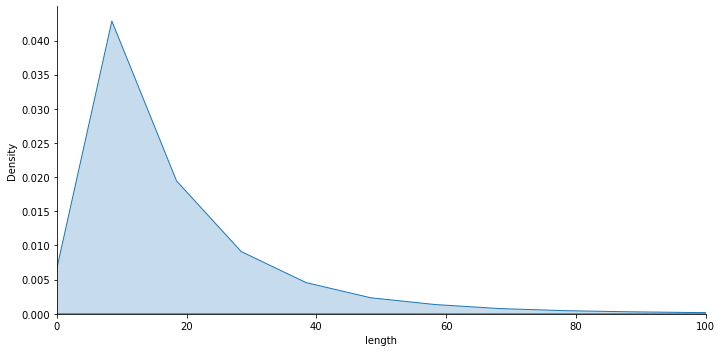

In [18]:
sns.displot(data=df_sample, x='length', palette='mako', kind='kde', fill=True, aspect=2)
plt.xlim(0, 100)